In this step, we'll analyze which publishers contribute most to the news feed and examine any differences in the types of news they report. This can help us understand the influence and focus of different publishers within the financial news ecosystem.

## Identify the Most Active Publishers

We will count the number of articles contributed by each publisher to identify the most active ones.


In [13]:
# Import necessary libraries for sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [14]:
# Load the dataset
df = pd.read_csv('data/raw_analyst_ratings/raw_analyst_ratings.csv')

In [15]:
# Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()

# Display the top 10 most active publishers
articles_per_publisher.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

## Analyze the Types of News by Publisher

We will analyze the sentiment of the articles published by the most active publishers to see if they tend to report more positive, negative, or neutral news.


In [16]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the 'headline' column
df['sentiment'] = df['headline'].apply(get_sentiment)

In [17]:
# Filter the top publishers (let's say the top 5 for simplicity)
top_publishers = articles_per_publisher.head(5).index

# Create a DataFrame for the top publishers
df_top_publishers = df[df['publisher'].isin(top_publishers)]

# Group by publisher and calculate the mean sentiment for each publisher
sentiment_by_publisher = df_top_publishers.groupby('publisher')['sentiment'].mean().sort_values()

# Display the sentiment scores
sentiment_by_publisher

publisher
Paul Quintaro        0.019636
Charles Gross        0.031943
Benzinga Newsdesk    0.042070
Lisa Levin           0.068302
Monica Gerson        0.155460
Name: sentiment, dtype: float64

## Visualize the Results

We will create visualizations to display the most active publishers and the sentiment distribution of their articles.


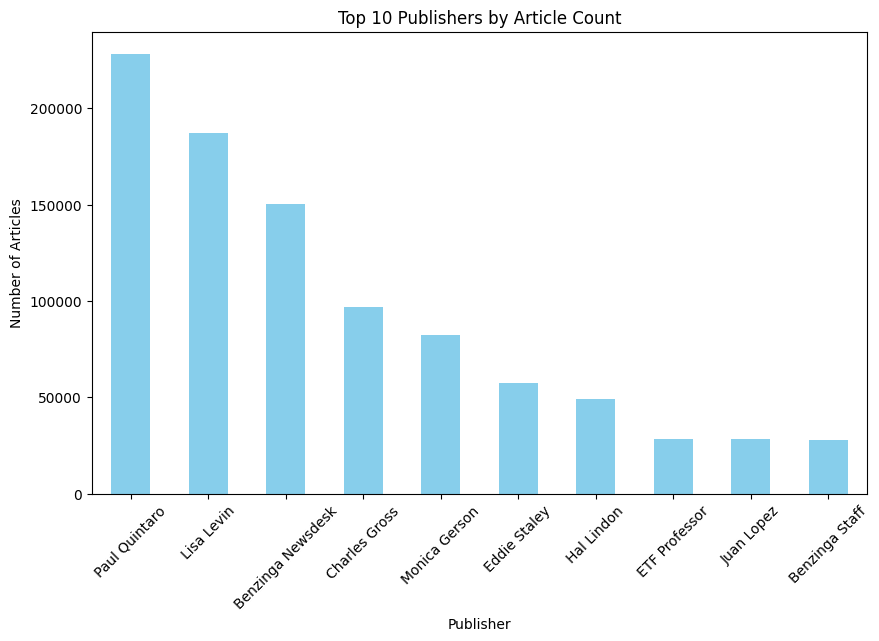

C:\Users\surafel\AppData\Local\Temp\ipykernel_20316\1259069677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_publisher.index, y=sentiment_by_publisher.values, palette='coolwarm')


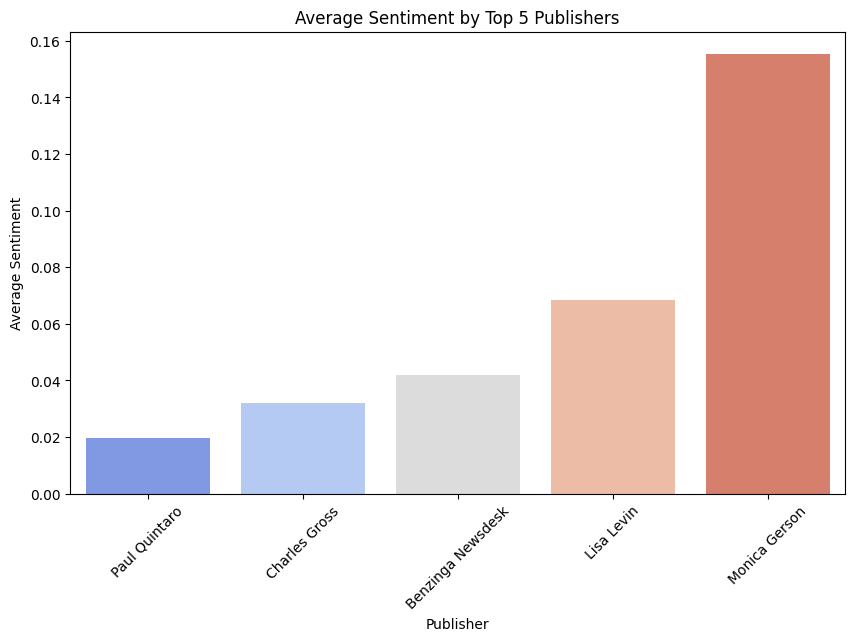

In [20]:
# Visualize the top 10 most active publishers
plt.figure(figsize=(10, 6))
articles_per_publisher.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Visualize the average sentiment by top 5 publishers
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_by_publisher.index, y=sentiment_by_publisher.values, palette='coolwarm')
plt.title('Average Sentiment by Top 5 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()

## Key Findings from Publisher Analysis

### 1. Most Active Publishers
- **Top Publishers**: The top 10 most active publishers are:
  - Paul Quintaro: 228,373 articles
  - Lisa Levin: 186,979 articles
  - Benzinga Newsdesk: 150,484 articles
  - Charles Gross: 96,732 articles
  - Monica Gerson: 82,380 articles
  - Eddie Staley: 57,254 articles
  - Hal Lindon: 49,047 articles
  - ETF Professor: 28,489 articles
  - Juan Lopez: 28,438 articles
  - Benzinga Staff: 28,114 articles

### 2. Sentiment Analysis by Publisher
- **Average Sentiment**: The average sentiment scores for the top 5 publishers are:
  - Paul Quintaro: 0.0196
  - Charles Gross: 0.0319
  - Benzinga Newsdesk: 0.0421
  - Lisa Levin: 0.0683
  - Monica Gerson: 0.1555